In [50]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# df = pd.read_pickle('https://github.com/Minoru938/CSPML/raw/refs/heads/master/CSPML_latest_codes/data_set/MP_stable_20211107.pd.xz')
df = pd.read_feather('data/cspbench/data.feather')
df

,struct,strfgp,comp,full_formula,total_atoms,ratio_class
id,,,,,,
mp-11806,"[[3.94133085 2.78694177 6.82658528] Li, [2.627...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(Li, Mg, Sn, Pt)",Li1Mg1Sn1Pt1,4,1:1:1:1
mp-2731,"[[0. 0. 0.] Ti, [0.46429621 2.59081074 1.17429...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(Ti, Ga)",Ti1Ga3,4,3:1
mp-23125,"[[2.82354684 6.30895561 0.60204687] K, [0.9019...","[0.09768580650322328, 0.08917453294983373, 0.0...","(K, Na, Fe, Cl)",K6Na2Fe2Cl12,22,6:3:1:1
mp-3147,"[[0. 0. 0.] Er, [ 2.05503393 2.38270683 -0.53...","[0.06701777900545354, 0.08207968112898413, 0.0...","(Er, Si, Au)",Er1Si2Au2,5,2:2:1
mp-30805,"[[3.70598082 4.34966549 2.89168198] Sr, [ 2.44...","[0.0765385280247497, 0.13616708472564884, 0.0,...","(Sr, Ni, Sn)",Sr1Ni1Sn3,5,3:1:1
...,...,...,...,...,...,...
mp-1106150,"[[0. 0. 0.] Ce, [0. 0. 3.21828...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...","(Ce, Mn, Cu, O)",Ce1Mn4Cu3O12,20,12:4:3:1
mp-4972,"[[2.64673198 1.87152231 4.58427529] Lu, [0. 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(Lu, In, Cu)",Lu1In1Cu2,4,2:1:1
mp-6686,"[[1.78232712 1.26029559 3.08708113] K, [5.3469...","[0.03692666619442267, 0.030150496692805555, 0....","(K, Na, In, F)",K2Na1In1F6,10,6:2:1:1


In [33]:
df['strfgp']

id
mp-11806      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-2731       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-23125      [0.09768580650322328, 0.08917453294983373, 0.0...
mp-3147       [0.06701777900545354, 0.08207968112898413, 0.0...
mp-30805      [0.0765385280247497, 0.13616708472564884, 0.0,...
                                    ...                        
mp-1106150    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000...
mp-4972       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
mp-6686       [0.03692666619442267, 0.030150496692805555, 0....
mp-6628       [0.3690030871841858, 0.336915740166443, 0.0, 0...
mp-19227      [0.08789398726111747, 0.10764771012421129, 0.0...
Name: strfgp, Length: 174, dtype: object

In [34]:
common_ratios = df.query('total_atoms <= 20 and ratio_class != "others"')['ratio_class'].value_counts().head(20)
common_ratios

ratio_class
6:2:1:1     18
2:1         18
2:1:1       16
1:1         13
3:1         12
1:1:1:1     11
4:1:1        8
1:1:1        7
4:1          6
3:1:1        6
2:2:1        5
2:2:1:1      5
12:4:3:1     5
12:4:1       3
4:3:3        3
5:3:1        2
5:2:1        2
4:3          2
4:2:1:1      2
5:2:1:1      2
Name: count, dtype: int64

In [42]:
df_ratio = df.query('ratio_class == "2:1"')
subset = df_ratio.sample(10, random_state=43)

Y = np.array(list(subset['strfgp']))

from scipy.spatial.distance import pdist, squareform

dists = pdist(Y, 'euclidean')
print(' '.join([f'{np.mean(dists < tau):.2%}' for tau in [0.1, 0.2, 0.3]]))
# sns.heatmap(squareform(dists), cmap='rho_heatmap_r')

0.00% 2.22% 2.22%


In [46]:
from tqdm import tqdm
rng = np.random.default_rng(1234)
pdist_batch_size = 0

dataset = []
for ratio in tqdm(common_ratios.index[::-1]):
    df_ratio: pd.DataFrame = df.query('ratio_class == @ratio').reset_index()
    
    if pdist_batch_size == 0 or pdist_batch_size >= len(df_ratio.index):
        groups = [np.arange(len(df_ratio.index))]
    else:
        groups = np.array_split(rng.permutation(df_ratio.shape[0]), pdist_batch_size)
    for group in groups:
        subset = df_ratio.iloc[group]
        Y = np.array(list(subset['strfgp']))
        dists = pdist(Y, 'euclidean')
        dm = squareform(dists)
        ii, jj = np.triu_indices_from(dm, k=1)
        cols = ['id', 'full_formula', 'space_group']
        data_dict = {'ratio': [ratio for _ in ii], 'dist': dm[(ii, jj)]}
        for inds, suff in zip((ii, jj), ('_1', '_2')):
            for col in cols:
                if col in subset.columns:
                    data_dict[col + suff] = subset.iloc[inds][col].values

        dataset.append(pd.DataFrame(data_dict))

data_df = pd.concat(dataset).reset_index(drop=True)
for col in ('ratio', 'id_1', 'full_formula_1', 'space_group_1', 'id_2', 'full_formula_2', 'space_group_2'):
    if col in data_df.columns:
        data_df[col] = data_df[col].astype('category')

100%|██████████| 20/20 [00:00<00:00, 365.90it/s]


In [ ]:
data_df

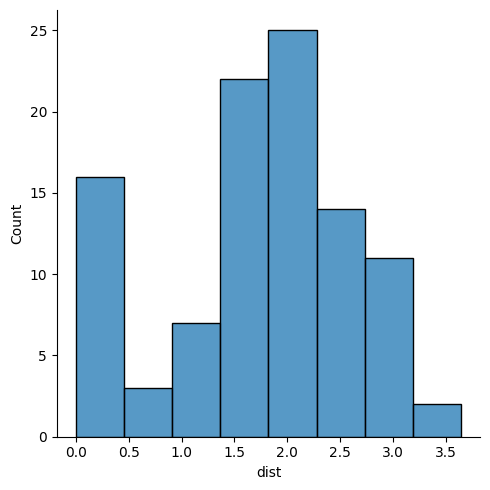

In [49]:
import seaborn as sns
sns.displot(data_df.sample(100), x='dist')

In [ ]:
data_df.query('dist < 0.01')

In [ ]:
data_df.to_feather('pairs_data.feather')